<a href="https://colab.research.google.com/github/LeeYuuuan/yuanyuansrep/blob/main/lalalalala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [45]:
import os

In [ ]:
!unzip "data" -d "data"

In [54]:
all_type = []
for file_name in os.listdir("datad"):
    all_type.append(os.path.join(file_name))
    print(all_type)

['jueyuan']
['jueyuan', 'wuquexian']
['jueyuan', 'wuquexian', 'shuizhu']
['jueyuan', 'wuquexian', 'shuizhu', 'bandaoti']
['jueyuan', 'wuquexian', 'shuizhu', 'bandaoti', 'qixi']
['jueyuan', 'wuquexian', 'shuizhu', 'bandaoti', 'qixi', 'qipao']


In [55]:
all_type

['jueyuan', 'wuquexian', 'shuizhu', 'bandaoti', 'qixi', 'qipao']

In [61]:
all_file_path = {}
folder_path = "datad/"
for file_name in all_type:
    file_path = []
    fp = os.path.join(folder_path, file_name)
    for f_n in os.listdir(fp):
        if f_n.endswith(".txt"):
            file_path.append(os.path.join(fp, f_n))
    all_file_path[file_name] = file_path

In [ ]:
all_file_path

In [81]:
len_all_file_path = 0


for key in all_file_path:
    len_all_file_path += len(all_file_path[key])
print(len_all_file_path)
len_feature = 0
for key in all_file_path:
    temp_np = np.loadtxt(all_file_path[key][0])
    len_feature += temp_np.shape[0]
    # print(len_feature)
    break




726


##generate data

In [334]:
def get_all_file_names(data_path):
    all_type = []
    for file_name in os.listdir(data_path):
        all_type.append(os.path.join(file_name))
    all_file_path = {}
    folder_path = data_path
    for file_name in all_type:
        file_path = []
        fp = os.path.join(folder_path, file_name)
        for f_n in os.listdir(fp):
            if f_n.endswith(".txt"):
                file_path.append(os.path.join(fp, f_n))
        all_file_path[file_name] = file_path
    return all_file_path

In [286]:
def get_data_len(data_path):
    len_all_file_path = 0
    for key in all_file_path:
        len_all_file_path += len(all_file_path[key])
    # print(len_all_file_path)
    len_feature = 0
    for key in all_file_path:
        temp_np = np.loadtxt(all_file_path[key][0])
        len_feature += temp_np.shape[0]
        # print(len_feature)
        break
    return len_all_file_path, len_feature

In [ ]:
!unzip "data1" -d "data1"

In [340]:
def generate_data(data_path):
    all_file_path = get_all_file_names(data_path)
    data_shape = get_data_len(data_path)
    data = np.zeros((len_all_file_path, len_feature))
    label = np.zeros(len_all_file_path)
    flag = 0
    sum_i = 0
    for key in all_file_path:
        for i in range(len(all_file_path[key])):
            label[sum_i] = flag
            data[sum_i] = np.loadtxt(all_file_path[key][i])
            sum_i += 1
        flag += 1
    return data, label




726


In [288]:
data_shape

(726, 4096)

## data1

In [ ]:
!unzip "data1" -d "data2"

In [342]:
data1, label1 = generate_data("data2/data1")
data, label = generate_data("datad")

726
726


In [ ]:
plt.plot(data1[0])

In [292]:
data.shape

(726, 4096)

In [296]:
data1.shape

(726, 4096)

In [ ]:
label == label1

In [391]:
data_cat = np.concatenate((data1, data), axis=1)
# label_cat = np.concatenate((label1, label), axis=1)

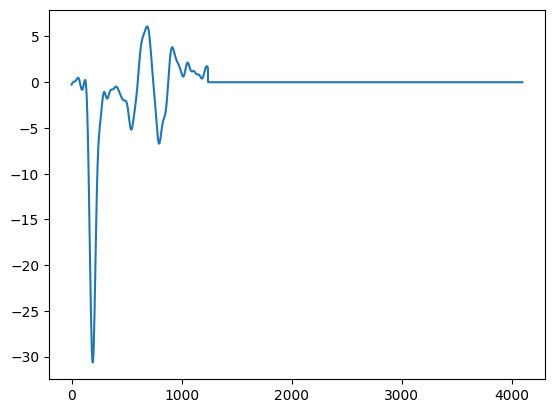

In [396]:
plt.plot(data_cat[0][4097:])

In [336]:
get_KNN_result(data_cat, label, 0.2, 5)

test_size:0.2, n_neighbors:5, accuracy:0.952054794520548 
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        24
         1.0       0.82      1.00      0.90        23
         2.0       1.00      0.87      0.93        23
         3.0       0.96      0.96      0.96        23
         4.0       1.00      0.91      0.95        22
         5.0       0.97      1.00      0.98        31

    accuracy                           0.95       146
   macro avg       0.96      0.95      0.95       146
weighted avg       0.96      0.95      0.95       146

[[23  0  0  1  0  0]
 [ 0 23  0  0  0  0]
 [ 0  3 20  0  0  0]
 [ 0  0  0 22  0  1]
 [ 0  2  0  0 20  0]
 [ 0  0  0  0  0 31]]
0:jueyuan 1:wuquexian 2:shuizhu 3:bandaoti 4:qixi 5:qipao


0.952054794520548

In [ ]:
data_minmax

In [388]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# 创建示例数据

# 使用MinMaxScaler进行归一化
scaler_minmax = MinMaxScaler()
data_minmax = scaler_minmax.fit_transform(data_cat)
#print("MinMaxScaler 归一化后的数据：")
#print(data_minmax)

idx, test_data = get_KNN_result(data_minmax, label, 0.2, 6,error=True)

test_size:0.2, n_neighbors:6, accuracy:0.9452054794520548 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        24
         1.0       0.84      1.00      0.91        21
         2.0       1.00      0.94      0.97        18
         3.0       0.96      0.92      0.94        24
         4.0       0.96      0.85      0.90        26
         5.0       0.94      0.97      0.96        33

    accuracy                           0.95       146
   macro avg       0.95      0.95      0.95       146
weighted avg       0.95      0.95      0.95       146

[[24  0  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0  0 17  0  1  0]
 [ 0  0  0 22  0  2]
 [ 0  4  0  0 22  0]
 [ 0  0  0  1  0 32]]
0:jueyuan 1:wuquexian 2:shuizhu 3:bandaoti 4:qixi 5:qipao
16 1.0 4.0


In [367]:
get_SVM_result(data_cat, label, 0.2, "linear")

test_size:0.2, kernel:linear, accuracy:0.9931506849315068 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        25
         1.0       0.96      1.00      0.98        24
         2.0       1.00      0.95      0.98        22
         3.0       1.00      1.00      1.00        28
         4.0       1.00      1.00      1.00        20
         5.0       1.00      1.00      1.00        27

    accuracy                           0.99       146
   macro avg       0.99      0.99      0.99       146
weighted avg       0.99      0.99      0.99       146

[[25  0  0  0  0  0]
 [ 0 24  0  0  0  0]
 [ 0  1 21  0  0  0]
 [ 0  0  0 28  0  0]
 [ 0  0  0  0 20  0]
 [ 0  0  0  0  0 27]]
0:jueyuan 1:wuquexian 2:shuizhu 3:bandaoti 4:qixi 5:qipao


0.9931506849315068

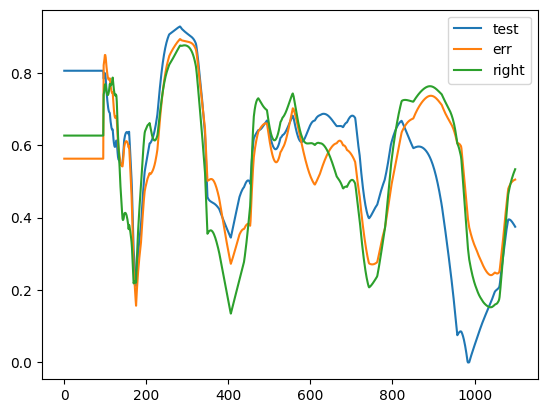

In [398]:
draw_pic(data_minmax, test_data, idx, 150, 500,4000,5100)

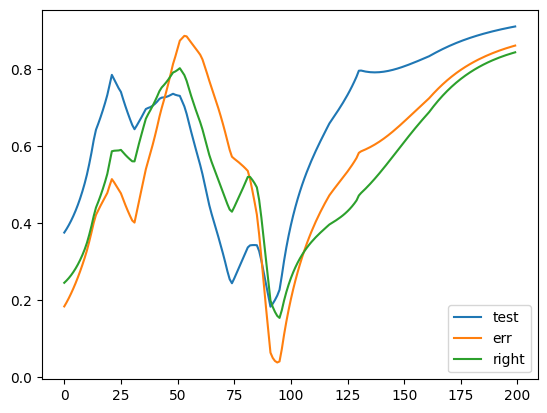

In [401]:
draw_pic(data_minmax, test_data, idx, 150, 500,0,200)

## SVM_Total

In [405]:
get_SVM_result(data_minmax, label, 0.2, "linear", error=True)

test_size:0.2, kernel:linear, accuracy:0.9931506849315068 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        31
         1.0       1.00      1.00      1.00        18
         2.0       1.00      0.96      0.98        25
         3.0       1.00      1.00      1.00        27
         4.0       0.95      1.00      0.98        21
         5.0       1.00      1.00      1.00        24

    accuracy                           0.99       146
   macro avg       0.99      0.99      0.99       146
weighted avg       0.99      0.99      0.99       146

[[31  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0 24  0  1  0]
 [ 0  0  0 27  0  0]
 [ 0  0  0  0 21  0]
 [ 0  0  0  0  0 24]]
0:jueyuan 1:wuquexian 2:shuizhu 3:bandaoti 4:qixi 5:qipao
133 4.0 2.0


0.9931506849315068

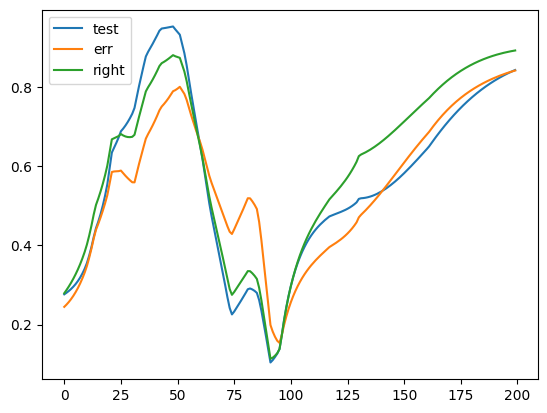

In [408]:
draw_pic(data_minmax, test_data, 133, 500, 250, 0, 200)

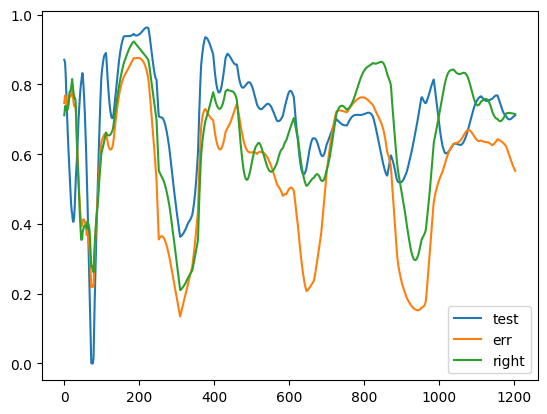

In [414]:
draw_pic(data_minmax, test_data, 133, 500, 250, 4097, 5300)

In [418]:
get_SVM_result(data_minmax, label, 0.2, "rbf")

test_size:0.2, kernel:rbf, accuracy:0.9863013698630136 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       1.00      1.00      1.00        28
         2.0       1.00      1.00      1.00        21
         3.0       1.00      0.94      0.97        33
         4.0       1.00      1.00      1.00        18
         5.0       0.93      1.00      0.96        26

    accuracy                           0.99       146
   macro avg       0.99      0.99      0.99       146
weighted avg       0.99      0.99      0.99       146

[[20  0  0  0  0  0]
 [ 0 28  0  0  0  0]
 [ 0  0 21  0  0  0]
 [ 0  0  0 31  0  2]
 [ 0  0  0  0 18  0]
 [ 0  0  0  0  0 26]]
0:jueyuan 1:wuquexian 2:shuizhu 3:bandaoti 4:qixi 5:qipao


0.9863013698630136

In [421]:
get_SVM_result(data_minmax, label, 0.2, "poly")

test_size:0.2, kernel:poly, accuracy:0.9863013698630136 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        25
         1.0       0.95      1.00      0.97        18
         2.0       1.00      0.96      0.98        26
         3.0       0.96      1.00      0.98        27
         4.0       1.00      1.00      1.00        19
         5.0       1.00      0.97      0.98        31

    accuracy                           0.99       146
   macro avg       0.99      0.99      0.99       146
weighted avg       0.99      0.99      0.99       146

[[25  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  1 25  0  0  0]
 [ 0  0  0 27  0  0]
 [ 0  0  0  0 19  0]
 [ 0  0  0  1  0 30]]
0:jueyuan 1:wuquexian 2:shuizhu 3:bandaoti 4:qixi 5:qipao


0.9863013698630136

In [424]:
get_SVM_result(data_minmax, label, 0.2, "sigmoid")

test_size:0.2, kernel:sigmoid, accuracy:0.0410958904109589 
              precision    recall  f1-score   support

         0.0       0.01      0.03      0.02        30
         1.0       0.26      0.25      0.26        20
         2.0       0.00      0.00      0.00        28
         3.0       0.00      0.00      0.00        22
         4.0       0.00      0.00      0.00        23
         5.0       0.00      0.00      0.00        23

    accuracy                           0.04       146
   macro avg       0.05      0.05      0.05       146
weighted avg       0.04      0.04      0.04       146

[[ 1  5 24  0  0  0]
 [15  5  0  0  0  0]
 [27  1  0  0  0  0]
 [ 8  2 12  0  0  0]
 [21  2  0  0  0  0]
 [17  4  2  0  0  0]]
0:jueyuan 1:wuquexian 2:shuizhu 3:bandaoti 4:qixi 5:qipao


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0410958904109589

##total

In [330]:
def get_KNN_result(data, label, test_size, n_neighbors, wprint=True, error=False):
    train_data, test_data, train_labels, test_labels = train_test_split(data, label, test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_data, train_labels)
    predictions = knn.predict(test_data)
    acc = accuracy_score(test_labels, predictions)
    report = classification_report(test_labels, predictions)

    # 打印评价报告
    if wprint:
        print(f"test_size:{test_size}, n_neighbors:{n_neighbors}, accuracy:{acc} ")
        print(report)
        print(confusion_matrix(test_labels, predictions))
        print(f"0:{all_type[0]} 1:{all_type[1]} 2:{all_type[2]} 3:{all_type[3]} 4:{all_type[4]} 5:{all_type[5]}")

    if error:
        for i in range(len(predictions)):
            if predictions[i] != test_labels[i]:
                print(i, predictions[i], test_labels[i])
                return i, test_data
    return acc

def draw_pic(data, test_data,test_i, err_i, right_i, nn_s, nn_e):
    plt.plot(test_data[test_i][nn_s:nn_e], label="test")
    plt.plot(data[err_i][nn_s:nn_e], label="err")
    plt.plot(data[right_i][nn_s:nn_e], label="right")
    plt.legend()
    plt.show()

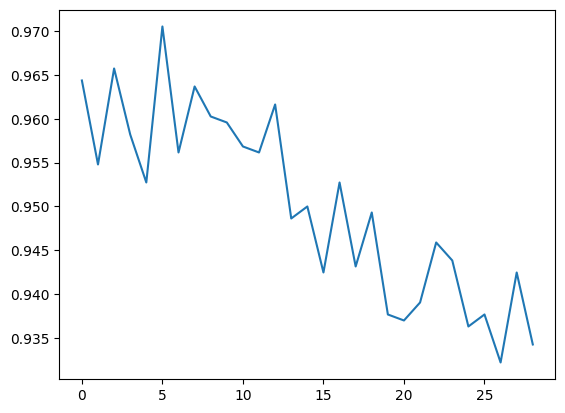

In [264]:
acc_rate = []
for i in range(1, 30):
    acc = 0
    for j in range(10):
        acc += get_KNN_result(data, label, 0.2, i, False)

    acc = acc/10
    acc_rate.append(acc)

plt.plot(acc_rate, label='accuracy rate')


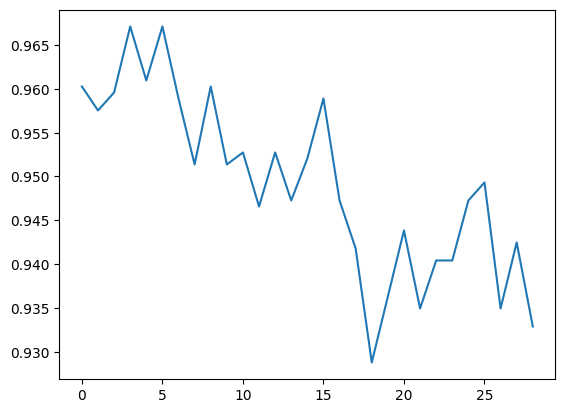

In [267]:
acc_rate = []
for i in range(1, 30):
    acc = 0
    for j in range(10):
        acc += get_KNN_result(data, label, 0.2, i, False)

    acc = acc/10
    acc_rate.append(acc)

plt.plot(acc_rate, label='accuracy rate')


In [269]:
get_KNN_result(data, label, 0.2, 5)
# 0.2: 8:2
# 5 = K
# 混淆矩阵
#

#yaodeyaode

test_size:0.2, n_neighbors:5, accuracy:0.9863013698630136 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        26
         1.0       0.96      1.00      0.98        26
         2.0       0.94      1.00      0.97        16
         3.0       1.00      1.00      1.00        29
         4.0       1.00      0.92      0.96        26
         5.0       1.00      1.00      1.00        23

    accuracy                           0.99       146
   macro avg       0.98      0.99      0.99       146
weighted avg       0.99      0.99      0.99       146

[[26  0  0  0  0  0]
 [ 0 26  0  0  0  0]
 [ 0  0 16  0  0  0]
 [ 0  0  0 29  0  0]
 [ 0  1  1  0 24  0]
 [ 0  0  0  0  0 23]]
0:jueyuan 1:wuquexian 2:shuizhu 3:bandaoti 4:qixi 5:qipao


0.9863013698630136

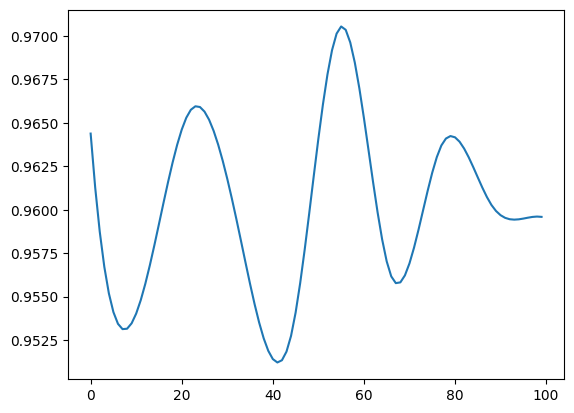

In [266]:
from scipy.interpolate import interp1d
f = interp1d([i for i in range(1, 30)], acc_rate, kind='cubic')  # 选择插值方法，这里使用三次样条插值
x_smooth = np.linspace(1, 10, 100)
# 生成平滑曲线上的更多点
y_smooth = f(x_smooth)
plt.plot(y_smooth, label='smooth')

## total SVM

In [404]:
def get_SVM_result(data, label, test_size, kernel_type, wprint=True, error=False):
    train_data, test_data, train_labels, test_labels = train_test_split(data, label, test_size=0.2)
    svm_clf = SVC(kernel=kernel_type)
    svm_clf.fit(train_data, train_labels)
    predictions = svm_clf.predict(test_data)
    acc = accuracy_score(test_labels, predictions)
    report = classification_report(test_labels, predictions)

    # 打印评价报告
    if wprint:
        print(f"test_size:{test_size}, kernel:{kernel_type}, accuracy:{acc} ")
        print(report)
        print(confusion_matrix(test_labels, predictions))
        print(f"0:{all_type[0]} 1:{all_type[1]} 2:{all_type[2]} 3:{all_type[3]} 4:{all_type[4]} 5:{all_type[5]}")


    if error:
        for i in range(len(predictions)):
            if predictions[i] != test_labels[i]:
                print(i, predictions[i], test_labels[i])
                # return i, test_data
    return acc

In [273]:
get_SVM_result(data, label, 0.2, "linear")

test_size:0.2, kernel:linear, accuracy:0.9794520547945206 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        27
         1.0       0.96      1.00      0.98        26
         2.0       1.00      0.92      0.96        24
         3.0       1.00      0.96      0.98        27
         4.0       0.93      1.00      0.97        14
         5.0       0.97      1.00      0.98        28

    accuracy                           0.98       146
   macro avg       0.98      0.98      0.98       146
weighted avg       0.98      0.98      0.98       146

[[27  0  0  0  0  0]
 [ 0 26  0  0  0  0]
 [ 0  1 22  0  1  0]
 [ 0  0  0 26  0  1]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0 28]]
0:jueyuan 1:wuquexian 2:shuizhu 3:bandaoti 4:qixi 5:qipao


0.9794520547945206

oth

In [274]:
get_SVM_result(data, label, 0.2, "rbf")

test_size:0.2, kernel:rbf, accuracy:0.9726027397260274 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        25
         1.0       0.85      1.00      0.92        23
         2.0       1.00      0.88      0.93        24
         3.0       1.00      1.00      1.00        23
         4.0       1.00      0.96      0.98        25
         5.0       1.00      1.00      1.00        26

    accuracy                           0.97       146
   macro avg       0.98      0.97      0.97       146
weighted avg       0.98      0.97      0.97       146

[[25  0  0  0  0  0]
 [ 0 23  0  0  0  0]
 [ 0  3 21  0  0  0]
 [ 0  0  0 23  0  0]
 [ 0  1  0  0 24  0]
 [ 0  0  0  0  0 26]]
0:jueyuan 1:wuquexian 2:shuizhu 3:bandaoti 4:qixi 5:qipao


0.9726027397260274

In [275]:
get_SVM_result(data, label, 0.2, "poly")

test_size:0.2, kernel:poly, accuracy:0.9931506849315068 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       1.00      1.00      1.00        22
         2.0       1.00      0.96      0.98        24
         3.0       1.00      1.00      1.00        20
         4.0       0.96      1.00      0.98        24
         5.0       1.00      1.00      1.00        26

    accuracy                           0.99       146
   macro avg       0.99      0.99      0.99       146
weighted avg       0.99      0.99      0.99       146

[[30  0  0  0  0  0]
 [ 0 22  0  0  0  0]
 [ 0  0 23  0  1  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0 24  0]
 [ 0  0  0  0  0 26]]
0:jueyuan 1:wuquexian 2:shuizhu 3:bandaoti 4:qixi 5:qipao


0.9931506849315068

In [283]:
get_SVM_result(data, label, 0.2, "sigmoid")

test_size:0.2, kernel:sigmoid, accuracy:0.9931506849315068 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       0.96      1.00      0.98        22
         2.0       1.00      1.00      1.00        22
         3.0       1.00      1.00      1.00        30
         4.0       1.00      0.96      0.98        26
         5.0       1.00      1.00      1.00        25

    accuracy                           0.99       146
   macro avg       0.99      0.99      0.99       146
weighted avg       0.99      0.99      0.99       146

[[21  0  0  0  0  0]
 [ 0 22  0  0  0  0]
 [ 0  0 22  0  0  0]
 [ 0  0  0 30  0  0]
 [ 0  1  0  0 25  0]
 [ 0  0  0  0  0 25]]
0:jueyuan 1:wuquexian 2:shuizhu 3:bandaoti 4:qixi 5:qipao


0.9931506849315068

In [ ]:
!zip -r data.zip datad

In [246]:
data = np.zeros((len_all_file_path, len_feature))
label = np.zeros(len_all_file_path)
flag = 0
sum_i = 0
for key in all_file_path:
    for i in range(len(all_file_path[key])):
        label[sum_i] = flag
        data[sum_i] = np.loadtxt(all_file_path[key][i])
        sum_i += 1
    flag += 1

In [ ]:
data

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)

In [91]:
train_data, test_data, train_labels, test_labels = train_test_split(data, label, test_size=0.2, random_state=42)

In [92]:
knn.fit(train_data, train_labels)
predictions = knn.predict(test_data)
acc = accuracy_score(test_labels, predictions)
print(acc)

0.9726027397260274


In [111]:
from sklearn.metrics import classification_report
report = classification_report(test_labels, predictions)

# 打印评价报告
print(report)
print(confusion_matrix(test_labels, predictions))
print(f"0:{all_type[0]} 1:{all_type[1]} 2:{all_type[2]} 3:{all_type[3]} 4:{all_type[4]} 5:{all_type[5]}")

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        30
         1.0       0.92      1.00      0.96        24
         2.0       0.96      0.93      0.94        27
         3.0       1.00      1.00      1.00        23
         4.0       0.94      0.89      0.91        18
         5.0       1.00      1.00      1.00        24

    accuracy                           0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146

[[30  0  0  0  0  0]
 [ 0 24  0  0  0  0]
 [ 0  1 25  0  1  0]
 [ 0  0  0 23  0  0]
 [ 0  1  1  0 16  0]
 [ 0  0  0  0  0 24]]
0:jueyuan 1:wuquexian 2:shuizhu 3:bandaoti 4:qixi 5:qipao


In [96]:
test_labels

array([2., 4., 4., 0., 4., 3., 0., 0., 2., 5., 2., 0., 3., 0., 5., 3., 5.,
       3., 1., 5., 0., 0., 3., 0., 0., 3., 5., 3., 2., 0., 0., 0., 1., 1.,
       5., 2., 4., 1., 2., 4., 2., 1., 1., 5., 1., 5., 2., 5., 3., 3., 0.,
       4., 1., 2., 2., 2., 4., 0., 5., 4., 2., 5., 0., 2., 0., 3., 0., 1.,
       1., 0., 4., 1., 3., 2., 2., 5., 1., 0., 4., 5., 5., 2., 4., 4., 5.,
       1., 3., 2., 0., 0., 1., 2., 3., 5., 0., 1., 3., 3., 3., 3., 4., 0.,
       1., 4., 4., 2., 0., 0., 2., 2., 3., 0., 5., 5., 2., 2., 5., 5., 3.,
       1., 2., 5., 3., 1., 1., 0., 1., 2., 4., 1., 0., 4., 1., 0., 0., 4.,
       5., 2., 1., 3., 5., 2., 5., 3., 1., 3.])

In [ ]:
predictions

In [ ]:
data.shape

In [104]:
for i in range(len(predictions)):
    if predictions[i] != test_labels[i]:
        print(i, predictions[i], test_labels[i])


39 1.0 4.0
91 1.0 2.0
108 4.0 2.0
128 2.0 4.0


<function matplotlib.pyplot.show(close=None, block=None)>

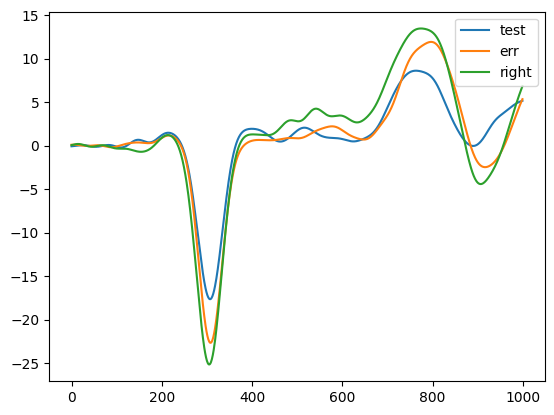

In [116]:
plt.plot(test_data[39][0:1000], label="test")
plt.plot(data[150][0:1000], label="err")
plt.plot(data[590][0:1000], label="right")
plt.legend()
plt.show

##

## svm

In [250]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.7, random_state=42)

# 创建一个SVM分类器
svm_clf_2 = SVC(kernel="linear")
svm_clf_2.fit(X_train, y_train)
predictions_svm = svm_clf_2.predict(X_test)
acc = accuracy_score(y_test, predictions_svm)
print(acc)


report = classification_report(y_test, predictions_svm)

# 打印评价报告
print(report)
print(confusion_matrix(y_test, predictions_svm))
print(f"0:{all_type[0]} 1:{all_type[1]} 2:{all_type[2]} 3:{all_type[3]} 4:{all_type[4]} 5:{all_type[5]}")

0.9941060903732809
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        93
         1.0       0.99      1.00      0.99        82
         2.0       0.98      1.00      0.99        90
         3.0       1.00      1.00      1.00        81
         4.0       1.00      0.96      0.98        79
         5.0       1.00      1.00      1.00        84

    accuracy                           0.99       509
   macro avg       0.99      0.99      0.99       509
weighted avg       0.99      0.99      0.99       509

[[93  0  0  0  0  0]
 [ 0 82  0  0  0  0]
 [ 0  0 90  0  0  0]
 [ 0  0  0 81  0  0]
 [ 0  1  2  0 76  0]
 [ 0  0  0  0  0 84]]
0:jueyuan 1:wuquexian 2:shuizhu 3:bandaoti 4:qixi 5:qipao


In [252]:
for i in range(len(predictions_svm)):
    if predictions_svm[i] != y_test[i]:
        print(i, predictions_svm[i], y_test[i])


39 1.0 4.0
315 2.0 4.0
465 2.0 4.0


##qiyu


(18, 6)

In [135]:
data_qiyu = np.loadtxt("qiyushuju.txt")

4.14	3.94	17.94	20.94	23.94	5



In [141]:
label_qiyu = np.zeros(data_qiyu.shape[0])
for i in range(data_qiyu.shape[0]):
    label_qiyu[i] = data_qiyu[i][5]

In [142]:
label_qiyu

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
np.delete(data_qiyu, 5, axis=1)

In [187]:
train_data, test_data, train_labels, test_labels = train_test_split(data_qiyu, label_qiyu, test_size=0.3, random_state=42)

In [189]:
knn_qiyu = KNeighborsClassifier(n_neighbors=2)
knn_qiyu.fit(train_data, train_labels)
predictions = knn_qiyu.predict(test_data)
acc = accuracy_score(test_labels, predictions)
print(acc)

0.9444444444444444


In [190]:


from sklearn.metrics import classification_report
report = classification_report(test_labels, predictions)

# 打印评价报告
print(report)
print(confusion_matrix(test_labels, predictions))
print(f"0:{all_type[0]} 1:{all_type[1]} 2:{all_type[2]} 3:{all_type[3]} 4:{all_type[4]} 5:{all_type[5]}")

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         4
         3.0       1.00      1.00      1.00         3
         4.0       0.75      1.00      0.86         3
         5.0       1.00      0.80      0.89         5

    accuracy                           0.94        18
   macro avg       0.95      0.96      0.95        18
weighted avg       0.96      0.94      0.95        18

[[3 0 0 0 0]
 [0 4 0 0 0]
 [0 0 3 0 0]
 [0 0 0 3 0]
 [0 0 0 1 4]]
0:jueyuan 1:wuquexian 2:shuizhu 3:bandaoti 4:qixi 5:qipao


In [191]:
for i in range(len(predictions)):
    if predictions[i] != test_labels[i]:
        print(i, predictions[i], test_labels[i])


0 4.0 5.0


<function matplotlib.pyplot.show(close=None, block=None)>

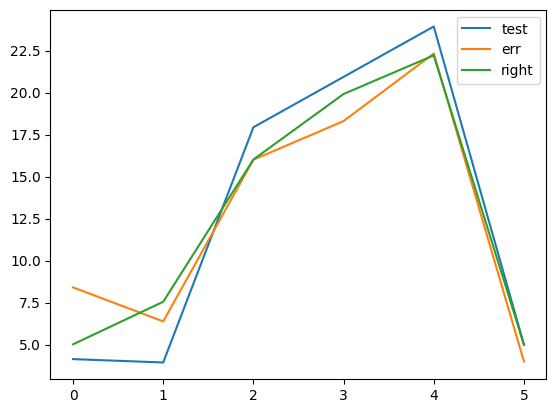

In [194]:
plt.plot(test_data[0], label="test")
plt.plot(data_qiyu[15], label="err")
plt.plot(data_qiyu[5], label="right")
plt.legend()
plt.show

In [196]:
test_data.shape

(18, 6)

In [203]:
X.shape

(100, 10)

In [205]:
test_data.shape

(18, 6)

In [211]:
test_labels

array([5., 5., 3., 0., 4., 1., 3., 0., 4., 1., 0., 1., 3., 5., 1., 4., 5.,
       5.])

In [221]:
data_show = np.zeros(2)
data_show.shape

(2,)

In [240]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(data_qiyu, label_qiyu, test_size=0.7, random_state=42)

# 创建一个SVM分类器
svm_clf_2 = SVC(kernel="linear")
svm_clf_2.fit(train_data, train_labels)
predictions_svm = svm_clf_2.predict(test_data)
acc = accuracy_score(test_labels, predictions_svm)
print(acc)



1.0


In [241]:
predictions_svm

array([5., 5., 3., 0., 4., 1., 3., 0., 4., 1., 0., 1., 3., 5., 1., 4., 5.,
       5.])

In [242]:
test_labels

array([5., 5., 3., 0., 4., 1., 3., 0., 4., 1., 0., 1., 3., 5., 1., 4., 5.,
       5.])

In [230]:
report = classification_report(test_labels, predictions_svm)

# 打印评价报告
print(report)
print(confusion_matrix(test_labels, predictions_svm))
print(f"0:{all_type[0]} 1:{all_type[1]} 2:{all_type[2]} 3:{all_type[3]} 4:{all_type[4]} 5:{all_type[5]}")

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         4
         3.0       1.00      1.00      1.00         3
         4.0       1.00      1.00      1.00         3
         5.0       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

[[3 0 0 0 0]
 [0 4 0 0 0]
 [0 0 3 0 0]
 [0 0 0 3 0]
 [0 0 0 0 5]]
0:jueyuan 1:wuquexian 2:shuizhu 3:bandaoti 4:qixi 5:qipao


In [223]:
class_list = []

for lb in range(6):
    flag = 0
    count = 0
    data_show = np.zeros(2)

for i in range(len(X)):
    if test_labels[i] == i:
        if flag == 0:
            flag = 1
            data_show = X_embedded[count]

        if flag == 1:
            data_show = np.concatenate((data_show, X_embedded[count]), axis=0)
        count += 1
    print(data_show.shape)
    plt.scatter(data_show[:, 0], data_show[:, 1])

plt.show()



(2,)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

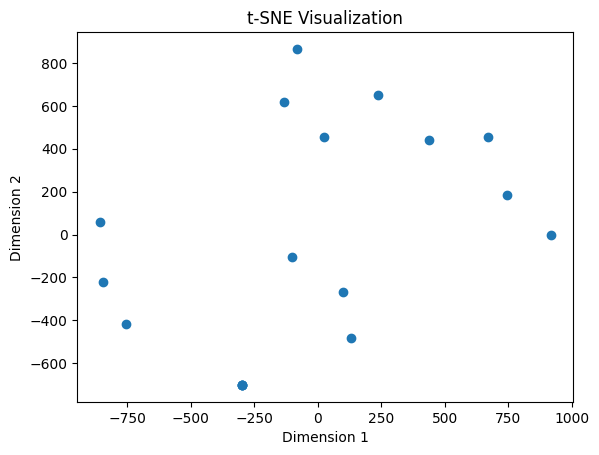

In [209]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
X = test_data

for i in range(len(X)):
    if test_labels[i] == 0:



# 使用t-SNE进行降维
X_embedded = tsne.fit_transform(X)

# 可视化降维后的数据
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],)
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()